Projeto 1:
    API com cotações de moedas

Materias:
    Awesome API - Apis Gratuitas

# Links:
http://economia.awesomeapi.com.br/json/last/USD-BRL,EUR-BRL,BTC-BRL

https://economia.awesomeapi.com.br/json/daily/USD-BRL/?start_date=20180901&end_date=20180930

In [137]:
import requests
import json

In [138]:
import numpy as np
import pandas as pd

In [139]:
from datetime import date, time, datetime

In [140]:
cotacoes_geral = requests.get('http://economia.awesomeapi.com.br/json/last/USD-BRL,EUR-BRL,BTC-BRL')
cotacoes_geral_dic = cotacoes_geral.json()
print(cotacoes_geral_dic) 

{'USDBRL': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.2007', 'low': '5.137', 'varBid': '0.054', 'pctChange': '1.05', 'bid': '5.1977', 'ask': '5.1982', 'timestamp': '1668027955', 'create_date': '2022-11-09 18:05:55'}, 'EURBRL': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '5.2239', 'low': '5.1613', 'varBid': '0.0219', 'pctChange': '0.42', 'bid': '5.2024', 'ask': '5.2034', 'timestamp': '1668027959', 'create_date': '2022-11-09 18:05:59'}, 'BTCBRL': {'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '100', 'low': '85.7', 'varBid': '-11384', 'pctChange': '-11.71', 'bid': '85.8', 'ask': '85.8', 'timestamp': '1668027623', 'create_date': '2022-11-09 18:00:23'}}


In [141]:
cotacao_USDBRL = cotacoes_geral_dic['USDBRL']['bid']
cotacao_EURBRL = cotacoes_geral_dic['EURBRL']['bid']
cotacao_BTCBRL = cotacoes_geral_dic['BTCBRL']['bid']
print(f'As cotações são USDBRL: {cotacao_USDBRL}, EURBRL: {cotacao_EURBRL}, BTCBRL: {cotacao_BTCBRL}')

As cotações são USDBRL: 5.1977, EURBRL: 5.2024, BTCBRL: 85.8


In [142]:
cot = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/365?start_date=20220101&end_date=20221022')
cot_dic = cot.json()
df_cot = pd.DataFrame(cot_dic, columns = ['high', 'low', 'varBid', 'bid', 'ask', 'timestamp'])
df_cot['timestamp'] = pd.to_datetime(df_cot['timestamp'], unit='s')
df_cot['data'] = df_cot['timestamp'].dt.date
print(df_cot.head())

     high     low   varBid     bid     ask           timestamp        data
0  5.2768  5.1414  -0.0502  5.1639  5.1651 2022-10-21 20:59:57  2022-10-21
1  5.2768  5.1414  -0.0502  5.1639  5.1651 2022-10-21 20:59:57  2022-10-21
2   5.218  5.2149   0.0033  5.2176  5.2184 2022-10-20 23:58:56  2022-10-20
3  5.2712  5.2705   0.0008  5.2703  5.2713 2022-10-19 23:59:41  2022-10-19
4  5.2414   5.241   0.0007  5.2408  5.2415 2022-10-18 23:59:36  2022-10-18


In [143]:
print(df_cot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   high       239 non-null    object        
 1   low        239 non-null    object        
 2   varBid     239 non-null    object        
 3   bid        239 non-null    object        
 4   ask        239 non-null    object        
 5   timestamp  239 non-null    datetime64[ns]
 6   data       239 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.2+ KB
None


In [144]:
df_cot['bid'] = df_cot['bid'].astype('float')

In [145]:
print(df_cot.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   high       239 non-null    object        
 1   low        239 non-null    object        
 2   varBid     239 non-null    object        
 3   bid        239 non-null    float64       
 4   ask        239 non-null    object        
 5   timestamp  239 non-null    datetime64[ns]
 6   data       239 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 13.2+ KB
None


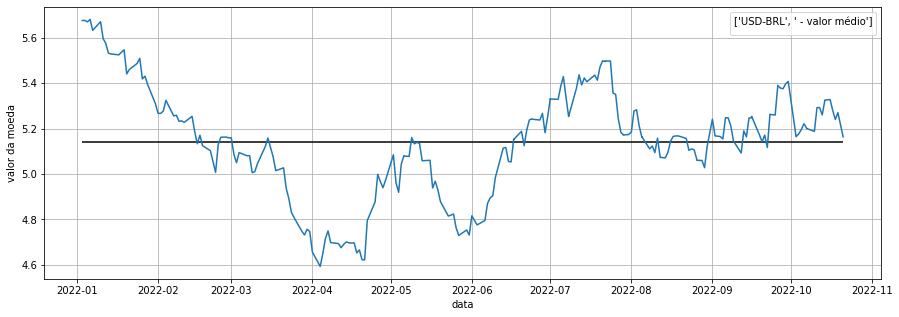

In [146]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))
(x, y) = (df_cot['data'], df_cot['bid'])
plt.plot(x, y)
plt.legend(title = ['USD-BRL', ' - valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14, df_cot['data'].min(), df_cot['data'].max(), color='black')
plt.grid()
plt.show()

In [175]:
# COTAÇÃO BTC
cot2 = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/365?start_date=20220101&end_date=20221022')
cot_dic2 = cot2.json()
df_cot2 = pd.DataFrame(cot_dic2, columns = ['high', 'low', 'varBid', 'bid', 'ask', 'timestamp'])
df_cot2['timestamp'] = pd.to_datetime(df_cot2['timestamp'], unit='s')
df_cot2['data'] = df_cot2['timestamp'].dt.date
print(df_cot2.head())

      high      low varBid      bid      ask           timestamp        data
0  100.464   99.576    311  100.123  100.266 2022-10-22 23:59:12  2022-10-22
1  100.521   99.262   -222   99.891  100.049 2022-10-21 23:57:31  2022-10-21
2      102   99.531  -1406  100.122  100.122 2022-10-20 23:59:25  2022-10-20
3  103.525  101.134   -418  101.416  101.528 2022-10-19 23:59:26  2022-10-19
4  103.847  101.046  -1168   101.82  101.926 2022-10-18 23:34:41  2022-10-18


In [176]:
df_cot2['bid'] = df_cot2['bid'].astype('float')

In [177]:
print(df_cot2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   high       295 non-null    object        
 1   low        295 non-null    object        
 2   varBid     295 non-null    object        
 3   bid        295 non-null    float64       
 4   ask        295 non-null    object        
 5   timestamp  295 non-null    datetime64[ns]
 6   data       295 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.3+ KB
None


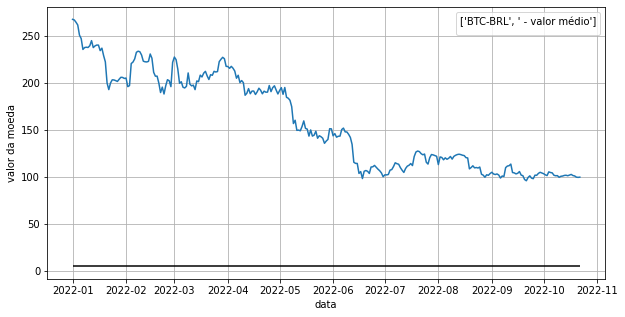

In [178]:
plt.figure(figsize=(10, 5))
(xBTC,yBTC) = (df_cot2['data'], df_cot2['bid'])
plt.plot(xBTC,yBTC)
plt.legend(title = ['BTC-BRL', ' - valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14, df_cot2['data'].min(), df_cot2['data'].max(), color='black')
plt.grid()
plt.show()

In [179]:
# COTAÇÃO EURO
cot3 = requests.get('https://economia.awesomeapi.com.br/json/daily/eur-BRL/365?start_date=20220101&end_date=20221022')
cot_dic3 = cot3.json()
df_cot3 = pd.DataFrame(cot_dic3, columns = ['high', 'low', 'varBid', 'bid', 'ask', 'timestamp'])
df_cot3['timestamp'] = pd.to_datetime(df_cot3['timestamp'], unit='s')
df_cot3['data'] = df_cot3['timestamp'].dt.date
print(df_cot3.head())

     high     low   varBid     bid     ask           timestamp        data
0  5.1352   5.069  -0.0105  5.0896  5.0924 2022-10-21 20:59:57  2022-10-21
1  5.1352   5.069  -0.0105  5.0896  5.0924 2022-10-21 20:59:57  2022-10-21
2  5.1079  5.0998   0.0007  5.1007  5.1036 2022-10-20 23:58:56  2022-10-20
3  5.1528  5.1445  -0.0019  5.1459   5.149 2022-10-19 23:59:41  2022-10-19
4  5.1741  5.1654   0.0056   5.168  5.1707 2022-10-18 23:59:37  2022-10-18


In [180]:
df_cot3['bid'] = df_cot3['bid'].astype('float')


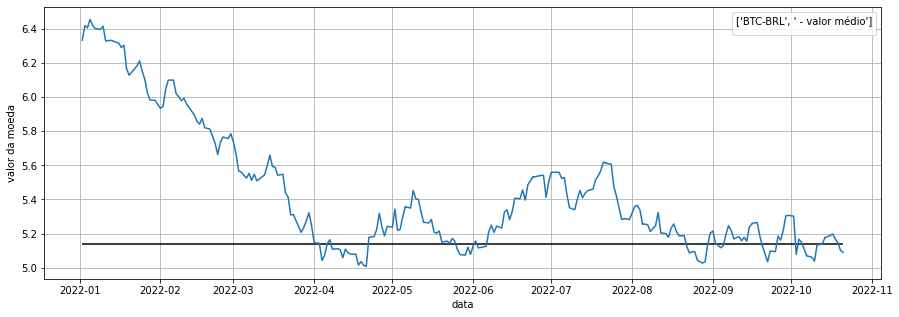

In [182]:
plt.figure(figsize=(15, 5))
(xEUR, yEUR) = (df_cot3['data'], df_cot3['bid'])
plt.plot(xEUR, yEUR)
plt.legend(title = ['BTC-BRL', ' - valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14, df_cot3['data'].min(), df_cot3['data'].max(), color='black')
plt.grid()
plt.show()

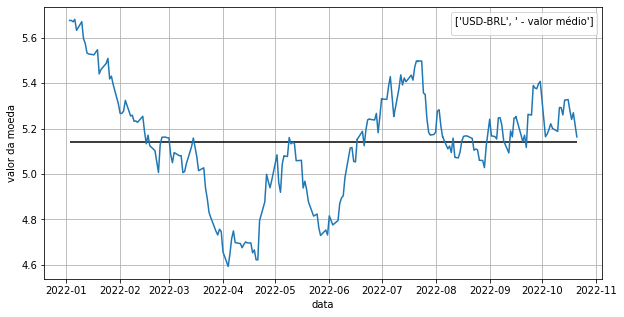

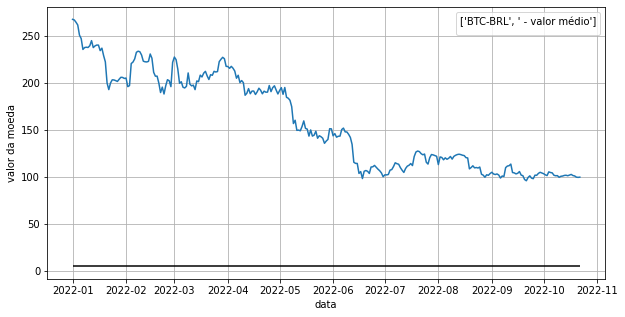

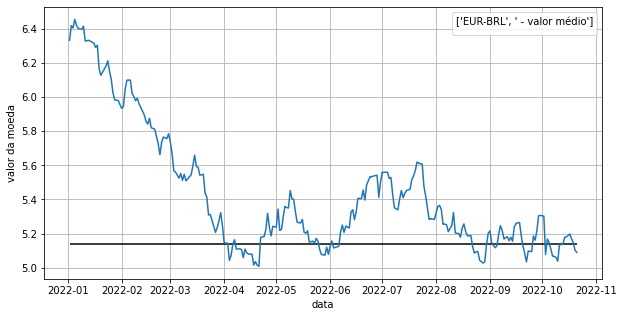

In [183]:
import matplotlib.pyplot as plt 
# Cotação Dolar
plt.figure(figsize=(10, 5))
(x, y) = (df_cot['data'], df_cot['bid'])
plt.plot(x, y)
plt.legend(title = ['USD-BRL', ' - valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14, df_cot['data'].min(), df_cot['data'].max(), color='black')
plt.grid()
plt.show()
# Cotação BTC
plt.figure(figsize=(10, 5))
(x, y) = (df_cot2['data'], df_cot2['bid'])
plt.plot(xBTC, yBTC)
plt.legend(title = ['BTC-BRL', ' - valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14, df_cot2['data'].min(), df_cot2['data'].max(), color='black')
plt.grid()
plt.show()
# Cotação EURO
plt.figure(figsize=(10, 5))
(x, y) = (df_cot3['data'], df_cot3['bid'])
plt.plot(xEUR, yEUR)
plt.legend(title = ['EUR-BRL', ' - valor médio'])
plt.xlabel('data')
plt.ylabel('valor da moeda')
plt.hlines(5.14, df_cot3['data'].min(), df_cot3['data'].max(), color='black')
plt.grid()
plt.show()